In [1]:
import festim as F
import numpy as np

my_model = F.Simulation()

my_model.mesh = F.MeshFromVertices(
    vertices=np.concatenate(
        [
            np.linspace(0, 10e-9, 1000),
            np.linspace(10e-9, 2e-3, 1000),
        ]
    )
)

barrier_K_r = 0.001
barrier_K_d = 0.1


steel_K_r = 1e-2
steel_K_d = 0.1

barrier_S_0 = (barrier_K_d/barrier_K_r)**(1/2)
steel_S_0 = (steel_K_d/steel_K_r)**(1/2)


barrier = F.Material(id=1, D_0=0.001, E_D=0, S_0=barrier_S_0, E_S=0, borders=[0, 10e-9])
steel_mat = F.Material(id=2, D_0=0.001, E_D=0, S_0=steel_S_0, E_S=0, borders=[10e-9, 2e-3])

assert barrier.S_0 > steel_mat.S_0, f"{barrier.S_0} <= {steel_mat.S_0}"

my_model.materials = F.Materials([barrier, steel_mat])

my_model.settings = F.Settings(
    absolute_tolerance=1e-3, relative_tolerance=1e-10, final_time=1e-2 # s
)

my_model.T = 500

my_model.dt = F.Stepsize(initial_value=1e-8, stepsize_change_ratio=1.1, dt_min=1e-6)

my_model.boundary_conditions = [
    F.DissociationFlux(Kd_0=barrier_K_d, E_Kd=0, P=1000, surfaces=[1]),
    F.RecombinationFlux(Kr_0=barrier_K_r, E_Kr=0, surfaces=[1], order=2),
    F.DirichletBC(value=0, surfaces=[2], field="solute"),
]

permeation_flux_quantity_with_coating = F.HydrogenFlux(surface=2)
my_model.exports = [
    F.DerivedQuantities([permeation_flux_quantity_with_coating])
]

my_model.initialise()
my_model.run()

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Time stepping...


/home/remidm/miniconda3/envs/MSPB-env/lib/python3.11/site-packages/festim/exports/derived_quantities/derived_quantities.py:129: DeprecationWarning: The current derived_quantities title style will be deprecated in a future release, please use show_units=True instead
  warnings.warn(


100.0 %        1.0e-02 s    Elapsed time so far: 0.5 s


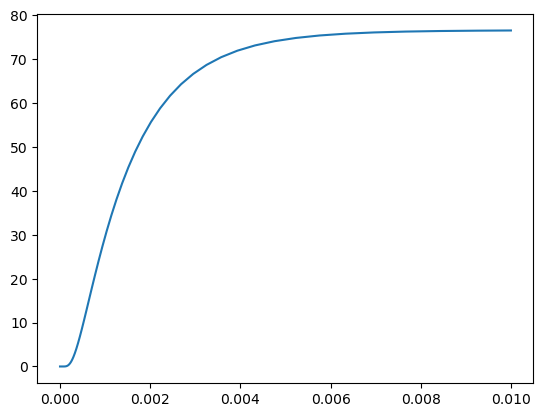

In [2]:
import matplotlib.pyplot as plt


plt.plot(permeation_flux_quantity_with_coating.t, -np.array(permeation_flux_quantity_with_coating.data))

In [3]:
my_model = F.Simulation()

my_model.mesh = F.MeshFromVertices(
    vertices=np.concatenate(
        [
            np.linspace(10e-9, 2e-3, 1000),
        ]
    )
)

steel_mat.borders = None
my_model.materials = F.Materials([steel_mat])

my_model.settings = F.Settings(
    absolute_tolerance=1e-3, relative_tolerance=1e-10, final_time=1e-2 # s
)

my_model.T = 500

my_model.dt = F.Stepsize(initial_value=1e-8, stepsize_change_ratio=1.1, dt_min=1e-6)

my_model.boundary_conditions = [
    F.DissociationFlux(Kd_0=steel_K_d, E_Kd=0, P=1000, surfaces=[1]),
    F.RecombinationFlux(Kr_0=steel_K_r, E_Kr=0, surfaces=[1], order=2),
    F.DirichletBC(value=0, surfaces=[2], field="solute"),
]

permeation_flux_quantity_bare = F.HydrogenFlux(surface=2)
my_model.exports = [
    F.DerivedQuantities([permeation_flux_quantity_bare])
]

my_model.initialise()
my_model.run()

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Time stepping...


/home/remidm/miniconda3/envs/MSPB-env/lib/python3.11/site-packages/festim/exports/derived_quantities/derived_quantities.py:129: DeprecationWarning: The current derived_quantities title style will be deprecated in a future release, please use show_units=True instead
  warnings.warn(


100.0 %        1.0e-02 s    Elapsed time so far: 0.3 s


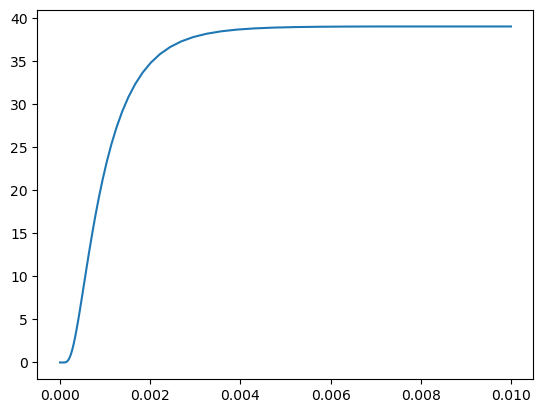

In [4]:
import matplotlib.pyplot as plt


plt.plot(permeation_flux_quantity_bare.t, -np.array(permeation_flux_quantity_bare.data))

PRF: 0.5102125340881135


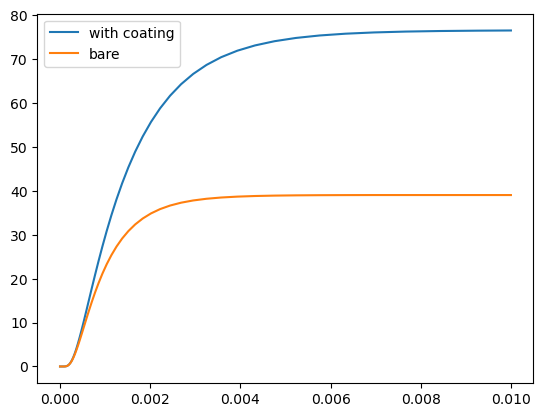

In [9]:
plt.plot(permeation_flux_quantity_with_coating.t, -np.array(permeation_flux_quantity_with_coating.data), label="with coating")
plt.plot(permeation_flux_quantity_bare.t, -np.array(permeation_flux_quantity_bare.data), label="bare")
plt.legend()

prf = np.array(permeation_flux_quantity_bare.data) / np.array(permeation_flux_quantity_with_coating.data)

print(f"PRF: {prf[-1]}")